## 웹 스크레이핑 시 주의사항

- 웹 페이지의 소스코드의 규칙을 파악할 수 있어야 한다.
- 너무 빈번하게 접근한다면 서버에 부담을 주기 때문에 지양해야한다.
- 웹 사이트는 언제든지 변경될 수 있다. 그러므로 지속적인 관리 필요!
- 인터넷 상에 공개된 데이터라고 하더라도 저작권이 있는 경우가 있다. 그러므로 저작권 침해 여부를 미리 확인해야 한다.

### 예제 1

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.alexa.com/topsites/countries/KR'

html_website_ranking = requests.get(url).text
soup_website_ranking = BeautifulSoup(html_website_ranking, 'lxml')

# p 태그의 요소 안에서 a 태그의 요소를 찾음.
website_ranking = soup_website_ranking.select('p a')

In [2]:
website_ranking[:7] # 맨 첫 번째는 순위와 상관없기 때문에 1부터 7까지 다시 출력해보자.

[<a href="https://support.alexa.com/hc/en-us/articles/200444340" target="_blank">this explanation</a>,
 <a href="/siteinfo/google.com">Google.com</a>,
 <a href="/siteinfo/naver.com">Naver.com</a>,
 <a href="/siteinfo/youtube.com">Youtube.com</a>,
 <a href="/siteinfo/tistory.com">Tistory.com</a>,
 <a href="/siteinfo/daum.net">Daum.net</a>,
 <a href="/siteinfo/kakao.com">Kakao.com</a>]

In [3]:
website_ranking[1:7]

[<a href="/siteinfo/google.com">Google.com</a>,
 <a href="/siteinfo/naver.com">Naver.com</a>,
 <a href="/siteinfo/youtube.com">Youtube.com</a>,
 <a href="/siteinfo/tistory.com">Tistory.com</a>,
 <a href="/siteinfo/daum.net">Daum.net</a>,
 <a href="/siteinfo/kakao.com">Kakao.com</a>]

In [4]:
website_ranking[1].get_text() # 하나의 항목에 대해 웹 사이트 주소를 추출

'Google.com'

In [5]:
website_ranking_address = [website_ranking_element.get_text() for website_ranking_element in website_ranking[1:]]

In [6]:
website_ranking_address[:6]

['Google.com',
 'Naver.com',
 'Youtube.com',
 'Tistory.com',
 'Daum.net',
 'Kakao.com']

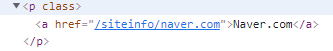

p안에 있는 a에 뭐가 있는지 확인할 수 있다.

In [7]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.alexa.com/topsites/countries/KR'

html_website_ranking = requests.get(url).text
soup_website_ranking = BeautifulSoup(html_website_ranking, 'lxml')

# p 태그의 요소 안에서 a 태그의 요소를 찾음
website_ranking = soup_website_ranking.select('p a')
website_ranking = [website_ranking_element.get_text() for website_ranking_element in website_ranking[1:]] # 첫 번째는 순위가 적혀있지 않기 때문에 제거한다.(위에서 확인할 수 있다.)

print('[Top Sites in South Korea]')
for k in range(6):
    print('{0} : {1}'.format(k+1, website_ranking_address[k]))

[Top Sites in South Korea]
1 : Google.com
2 : Naver.com
3 : Youtube.com
4 : Tistory.com
5 : Daum.net
6 : Kakao.com


In [8]:
import pandas as pd

website_ranking_dict = {'Website':website_ranking_address}
df = pd.DataFrame(website_ranking_dict, columns = ['Website'],
                  index = range(1,len(website_ranking_address) + 1))
df[:6]

,Website
1,Google.com
2,Naver.com
3,Youtube.com
4,Tistory.com
5,Daum.net
6,Kakao.com


### 예제 2

웹 페이지에서 이미지 가져오기

In [17]:
import requests

url = 'https://www.python.org/static/img/python-logo.png'
html_image = requests.get(url)
html_image

<Response [200]>

In [19]:
import os

# requests.get(url).text로 url 소스를 가져왔다면 이번에는 이미지 이름을 가져온다.
image_file_name = os.path.basename(url)
image_file_name

'python-logo.png'

### 예제 3

웹 페이지에서 여러 이미지 가져오기

[]